In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
# Helper to load a file like rho_out.txt
def load_field(filename):
    data = []
    zs = []
    with open(filename) as f:
        lines = f.readlines()
    i = 0
    while i < len(lines):
        # skip empty lines
        if not lines[i].strip():
            i += 1
            continue
        # first line is z
        z = float(lines[i].strip())
        zs.append(z)
        i += 1
        # next N lines until blank
        block = []
        while i < len(lines) and lines[i].strip():
            row = list(map(float, lines[i].split()))
            block.append(row)
            i += 1
        data.append(block)
    return np.array(zs), np.array(data)  # zs: (K,), data: (K, N, M)

In [8]:
# Body radius function
def r_b(z):
    # return np.tan(np.pi/12) * np.sqrt(2*z - 1)
    return np.tan(np.pi/12) * z

In [17]:
# Load fields
zs, rho = load_field('rho_out.txt')
_, p = load_field('p_out.txt')
_, u = load_field('u_out.txt')
_, v = load_field('v_out.txt')
_, w = load_field('w_out.txt')
# Load r_s
rs = []
zs_rs = []
with open('r_s_out.txt') as f:
    for line in f:
        parts = list(map(float, line.split()))
        zs_rs.append(parts[0])
        rs.append(parts[1:])
rs = np.array(rs)  # (K, M)
zs_rs = np.array(zs_rs)

In [21]:
xi

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

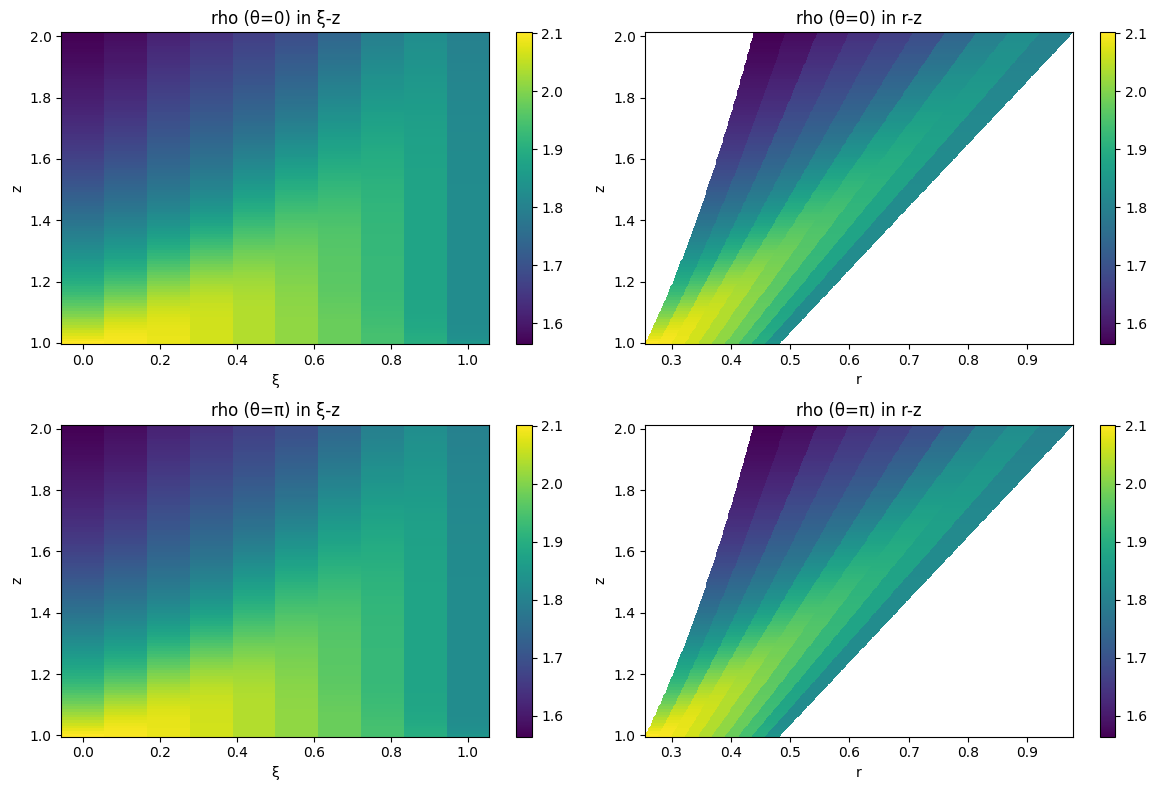

In [22]:
# Choose theta indices: 0 and M-1
K, N, M = rho.shape
xi = np.linspace(0, 1, N)

# Extract slices for theta=0
rho_theta0 = rho[:, :, 0]     # shape (K,N)
rho_thetap = rho[:, :, -1]

# Now plot for rho at theta=0
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
# Normalized (xi, z)
im0 = axs[0,0].pcolormesh(xi, zs, rho_theta0, shading='auto')
axs[0,0].set_title('rho (θ=0) in ξ-z')
axs[0,0].set_ylabel('z')
axs[0,0].set_xlabel('ξ')
fig.colorbar(im0, ax=axs[0,0])

# Physical r: need r = r_b(z) + ξ*(r_s(z) - r_b(z))
# For theta=0, r_s = rs[:,0]
r_phys = np.zeros_like(rho_theta0)
for k in range(K):
    r_phys[k,:] = r_b(zs[k]) + xi*(rs[k,0] - r_b(zs[k]))

im1 = axs[0,1].pcolormesh(r_phys, zs, rho_theta0, shading='auto')
axs[0,1].set_title('rho (θ=0) in r-z')
axs[0,1].set_xlabel('r')
axs[0,1].set_ylabel('z')
fig.colorbar(im1, ax=axs[0,1])

# Repeat for theta=π
im2 = axs[1,0].pcolormesh(xi, zs, rho_thetap, shading='auto')
axs[1,0].set_title('rho (θ=π) in ξ-z')
axs[1,0].set_xlabel('ξ')
axs[1,0].set_ylabel('z')
fig.colorbar(im2, ax=axs[1,0])

r_phys_p = np.zeros_like(rho_thetap)
for k in range(K):
    r_phys_p[k,:] = r_b(zs[k]) + xi*(rs[k,-1] - r_b(zs[k]))

im3 = axs[1,1].pcolormesh(r_phys_p, zs, rho_thetap, shading='auto')
axs[1,1].set_title('rho (θ=π) in r-z')
axs[1,1].set_xlabel('r')
axs[1,1].set_ylabel('z')
fig.colorbar(im3, ax=axs[1,1])

plt.tight_layout()
plt.show()

In [4]:
rho

array([[[2.10136, 2.10136, 2.10136, ..., 2.10136, 2.10136, 2.10136],
        [2.0962 , 2.0962 , 2.0962 , ..., 2.0962 , 2.0962 , 2.0962 ],
        [2.08291, 2.08291, 2.08291, ..., 2.08291, 2.08291, 2.08291],
        ...,
        [1.94285, 1.94285, 1.94285, ..., 1.94285, 1.94285, 1.94285],
        [1.89993, 1.89993, 1.89993, ..., 1.89993, 1.89993, 1.89993],
        [1.84706, 1.84706, 1.84706, ..., 1.84706, 1.84706, 1.84706]],

       [[2.10279, 2.10279, 2.10279, ..., 2.10279, 2.10279, 2.10279],
        [2.0962 , 2.0962 , 2.0962 , ..., 2.0962 , 2.0962 , 2.0962 ],
        [2.08289, 2.08289, 2.08289, ..., 2.08289, 2.08289, 2.08289],
        ...,
        [1.9428 , 1.9428 , 1.9428 , ..., 1.9428 , 1.9428 , 1.9428 ],
        [1.89988, 1.89988, 1.89988, ..., 1.89988, 1.89988, 1.89988],
        [1.83562, 1.83562, 1.83562, ..., 1.83562, 1.83562, 1.83562]],

       [[2.10405, 2.10405, 2.10405, ..., 2.10405, 2.10405, 2.10405],
        [2.09623, 2.09623, 2.09623, ..., 2.09623, 2.09623, 2.09623],
    